In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('downloads/german credit.csv')
df.head()


,Creditability,Account Balance,DurationOfCredit,Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [2]:
#category = pd.cut(df.Age,bins=[0,2,17,65,99],labels=['Toddler/baby','Child','Adult','Elderly'])
#df.insert(5,'Age Group',category)

#category = pd.cut(df.DurationOfCredit,bins=[0,6,12,18,24,30,50],labels=['Less','Normal','Long','Very Long', 'Extremely Long', 'Longest'])
#df.insert(6,'Duration Group',category)
#df


In [3]:
y = df['Creditability']
x = df.drop('Creditability',axis=1)

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=0)

from sklearn.naive_bayes import GaussianNB
Gaussmodel = GaussianNB()
Gaussmodel.fit(X_train,y_train)
pred_1 = Gaussmodel.predict(X_test)
print(metrics.accuracy_score(y_test, pred_1))


0.7575


In [4]:
print(Gaussmodel.score(X_train, y_train))

0.7333333333333333


In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree.fit(X_train, y_train)
pred_3 = tree.predict(X_test)
print(metrics.accuracy_score(y_test, pred_3))

0.6925


In [6]:
print(tree.score(X_train, y_train))

0.76


In [7]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression(C=100.0, random_state=1)
logModel.fit(X_train,y_train)
pred_2 = logModel.predict(X_test)
print(metrics.accuracy_score(y_test, pred_2))

0.7625


/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [8]:
print(logModel.score(X_train, y_train))

0.7766666666666666


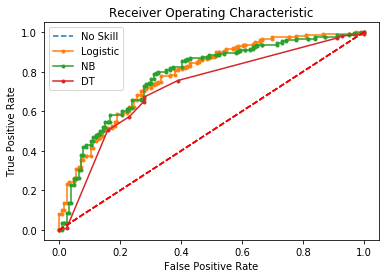

In [9]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve

probsGM = Gaussmodel.predict_proba(X_test)
ns_probs = [0 for _ in range(len(y_test))]
predsGM = probsGM[:,1]

probsDT = tree.predict_proba(X_test)

predsDT = probsDT[:,1]

probsLR = logModel.predict_proba(X_test)

predsLR = probsLR[:,1]

lr_fpr, lr_tpr, _ = roc_curve(y_test, predsLR)
gm_fpr, gm_tpr, _ = roc_curve(y_test, predsGM)
dt_fpr, dt_tpr, _ = roc_curve(y_test, predsDT)

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.legend()
plt.plot([0, 1], [0, 1],'r--')

plt.plot(gm_fpr, gm_tpr, marker='.', label='NB')
plt.legend()
plt.plot([0, 1], [0, 1],'r--')

plt.plot(dt_fpr, dt_tpr, marker='.', label='DT')
plt.legend()
plt.plot([0, 1], [0, 1],'r--')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




In [10]:
from sklearn import model_selection

models = []
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
results = []
names = []
scoring = 'accuracy'
for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

LR: 0.689000 (0.255361)
DT: 0.656000 (0.121095)
NB: 0.689000 (0.130648)


/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/mac/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

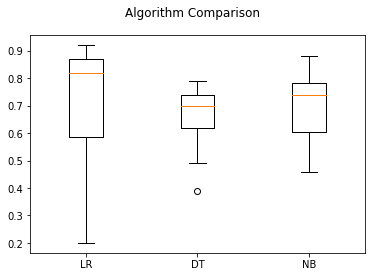

In [11]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()